# Goaussian Naive Bayes

In [221]:
# import library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [222]:
# read data
Data = pd.read_csv('diabetes.csv')
Data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [223]:
Df = pd.DataFrame(Data.drop('Pregnancies', axis=1))
Df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


In [224]:
Df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


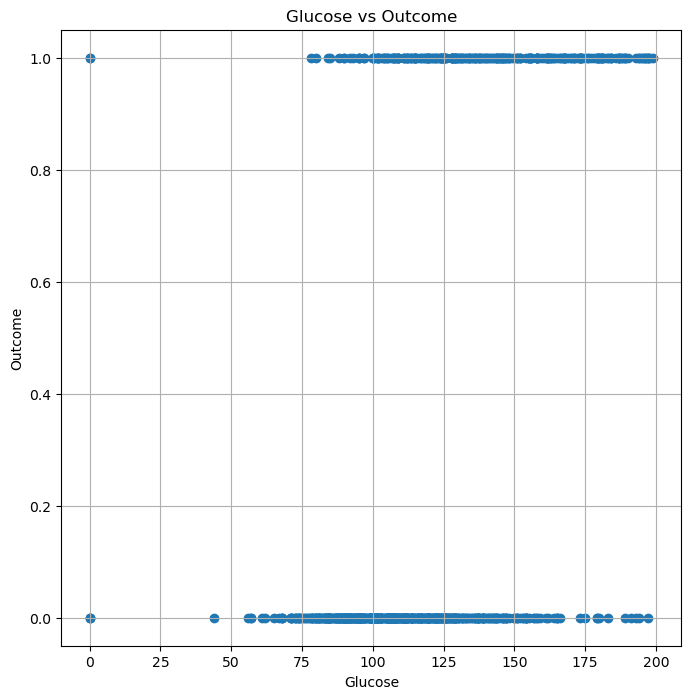

In [225]:
plt.figure(figsize=(8,8))
plt.scatter(Df.Glucose, Df.Outcome)
plt.xlabel('Glucose')
plt.ylabel('Outcome')
plt.title('Glucose vs Outcome')
plt.grid()
plt.show()

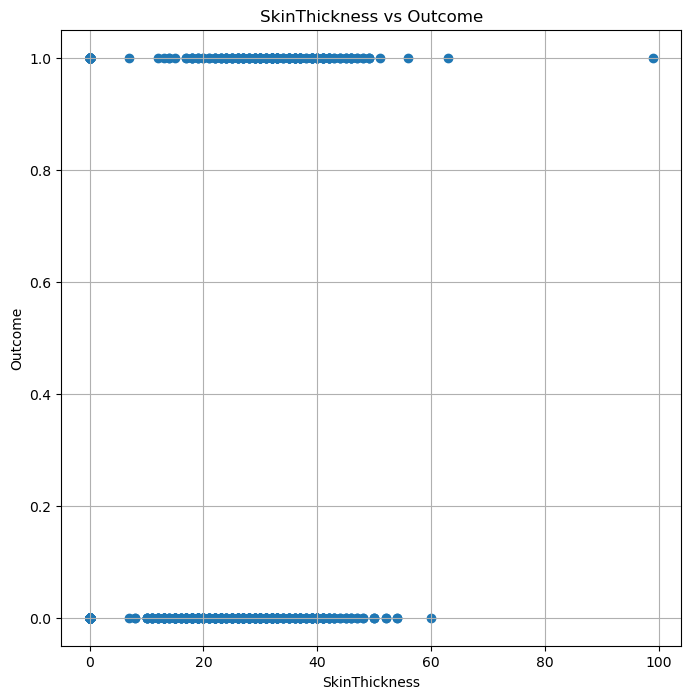

In [226]:
plt.figure(figsize=(8,8))
plt.scatter(Df.SkinThickness, Df.Outcome)
plt.xlabel('SkinThickness')
plt.ylabel('Outcome')
plt.title('SkinThickness vs Outcome')
plt.grid()
plt.show()

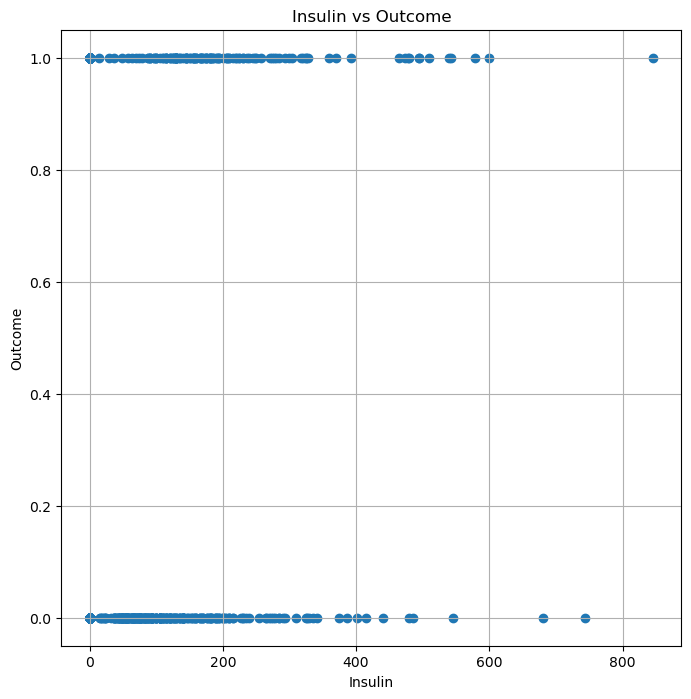

In [227]:
plt.figure(figsize=(8,8))
plt.scatter(Df.Insulin, Df.Outcome)
plt.xlabel('Insulin')
plt.ylabel('Outcome')
plt.title('Insulin vs Outcome')
plt.grid()
plt.show()

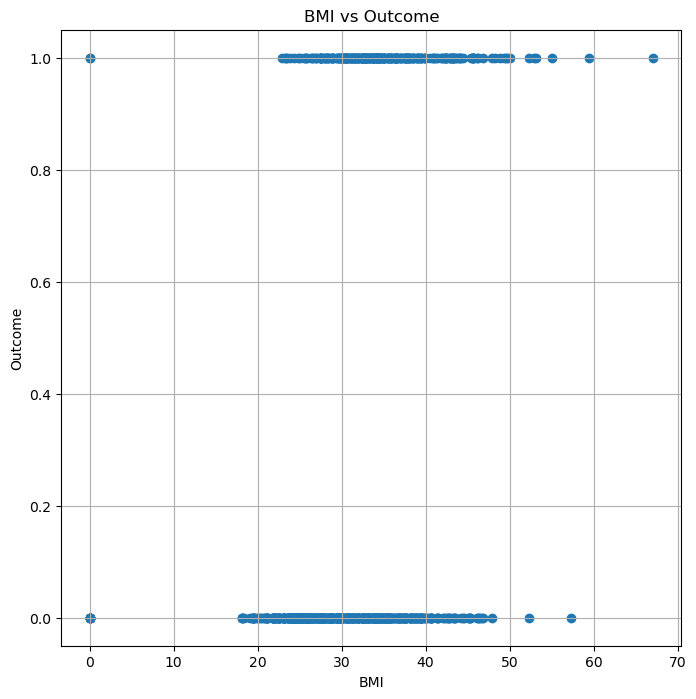

In [228]:
plt.figure(figsize=(8,8))
plt.scatter(Df.BMI, Df.Outcome)
plt.xlabel('BMI')
plt.ylabel('Outcome')
plt.title('BMI vs Outcome')
plt.grid()
plt.show()

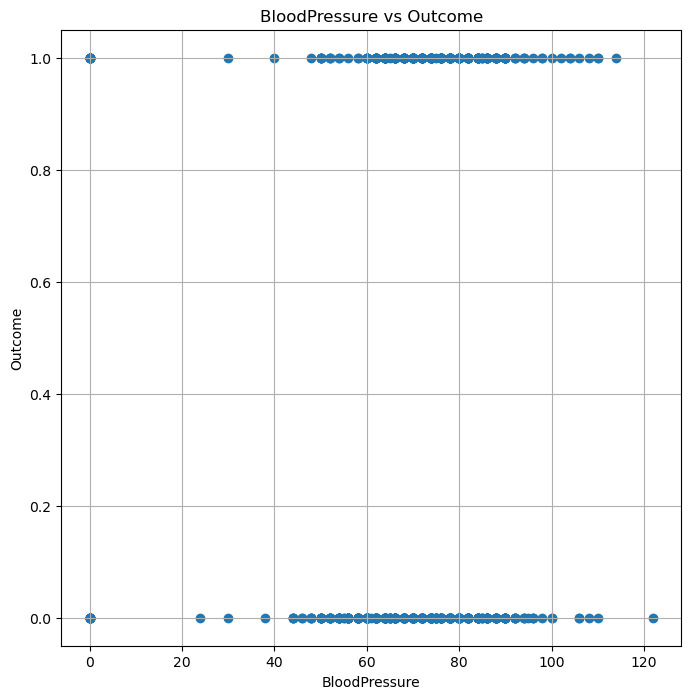

In [229]:
plt.figure(figsize=(8,8))
plt.scatter(Df.BloodPressure, Df.Outcome)
plt.xlabel('BloodPressure')
plt.ylabel('Outcome')
plt.title('BloodPressure vs Outcome')
plt.grid()
plt.show()

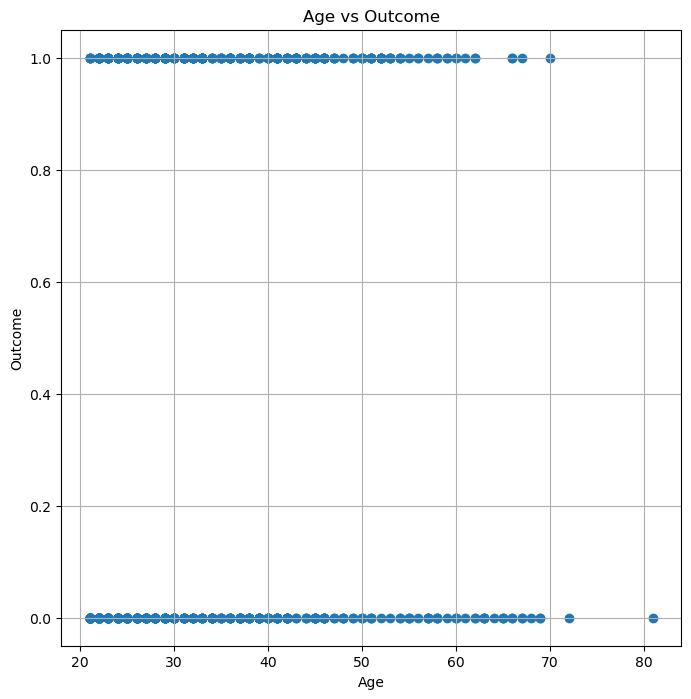

In [230]:
plt.figure(figsize=(8,8))
plt.scatter(Df.Age, Df.Outcome)
plt.xlabel('Age')
plt.ylabel('Outcome')
plt.title('Age vs Outcome')
plt.grid()
plt.show()

In [231]:
Df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,183,64,0,0,23.3,0.672,32,1
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0
766,126,60,0,0,30.1,0.349,47,1


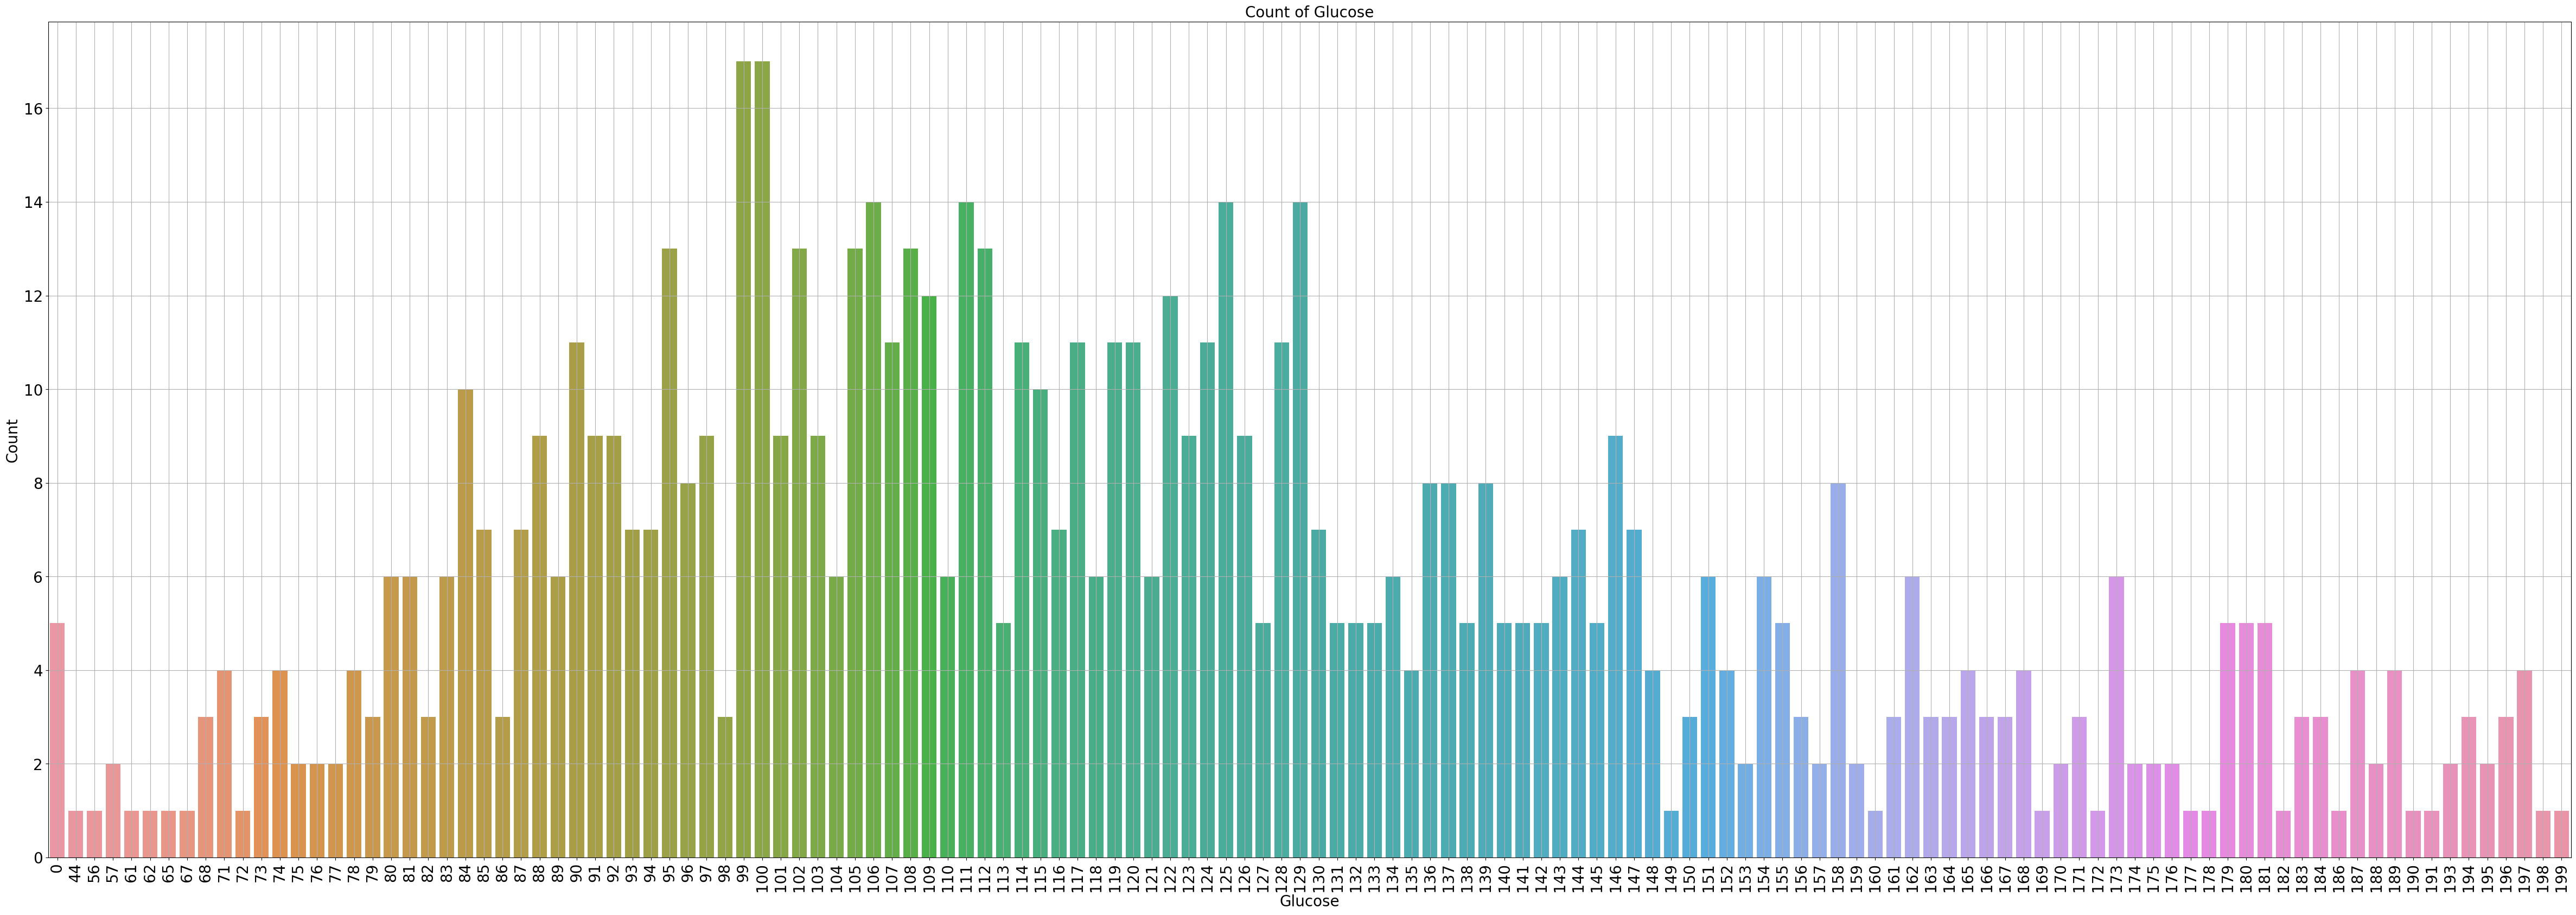

In [232]:
plt.figure(figsize=(60,20))
ax = sns.countplot(x="Glucose", data=Df)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Glucose", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title('Count of Glucose', fontsize=20)
plt.grid()
plt.show()

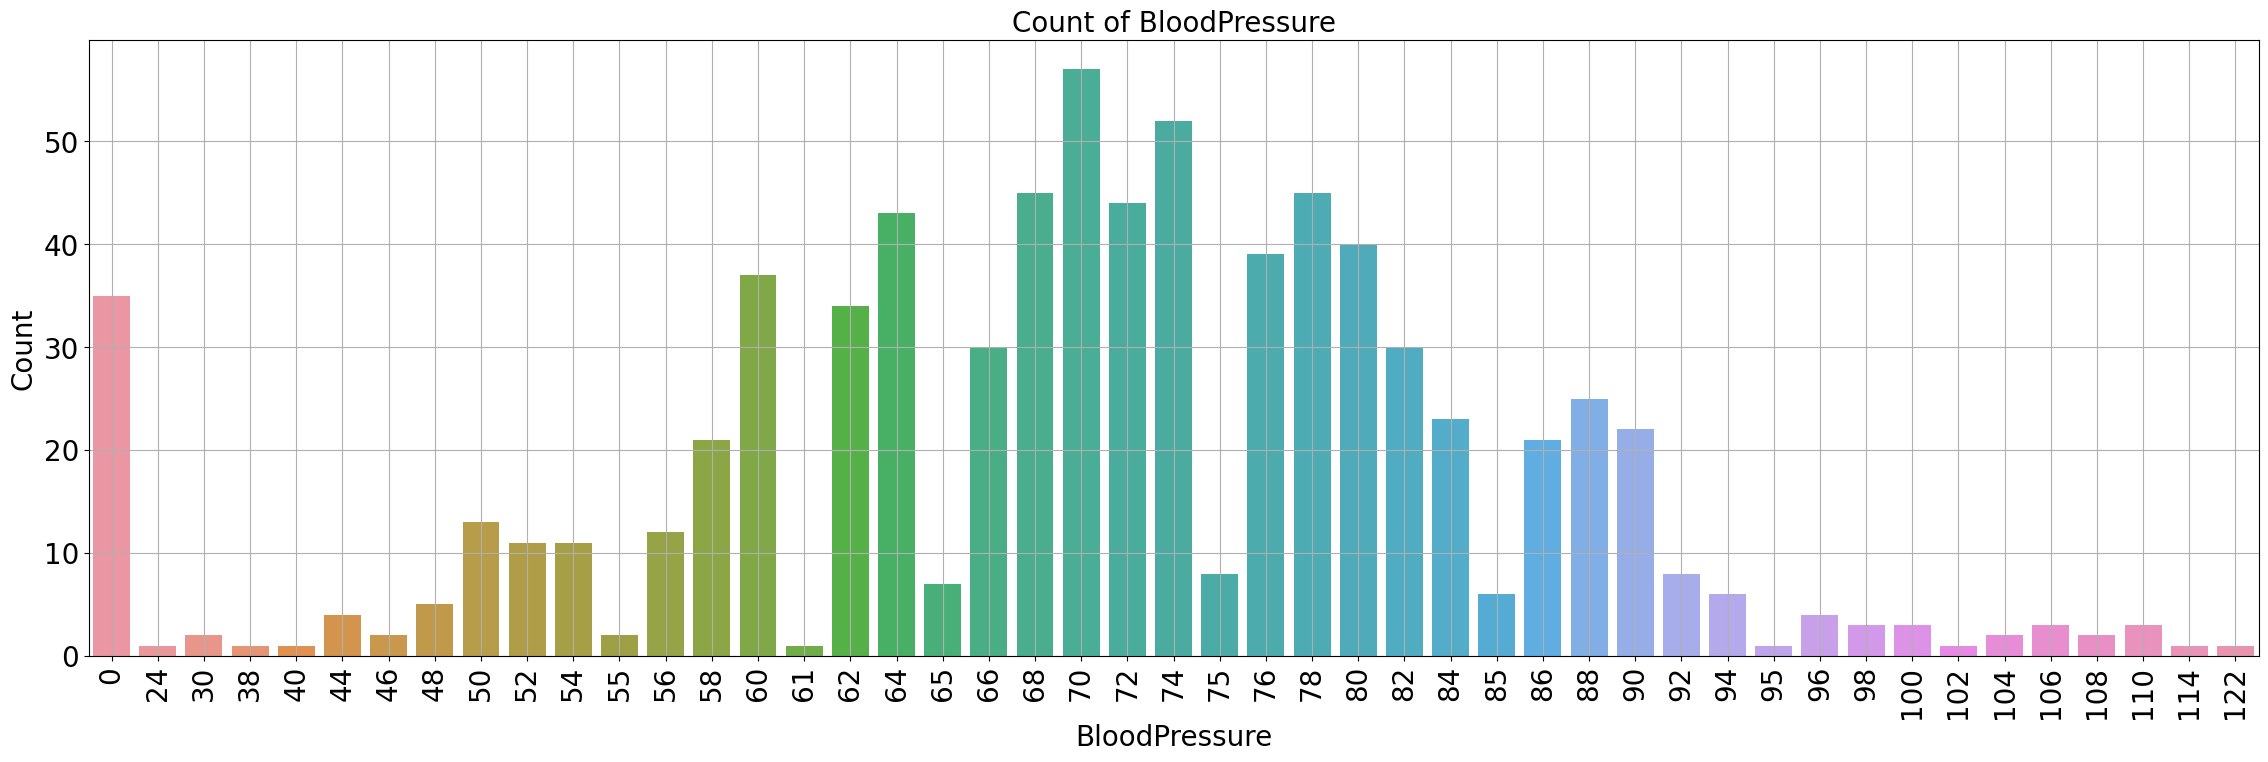

In [233]:
plt.figure(figsize=(28,8))
ax = sns.countplot(x="BloodPressure", data=Df)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("BloodPressure", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title('Count of BloodPressure', fontsize=20)
plt.grid()
plt.show()

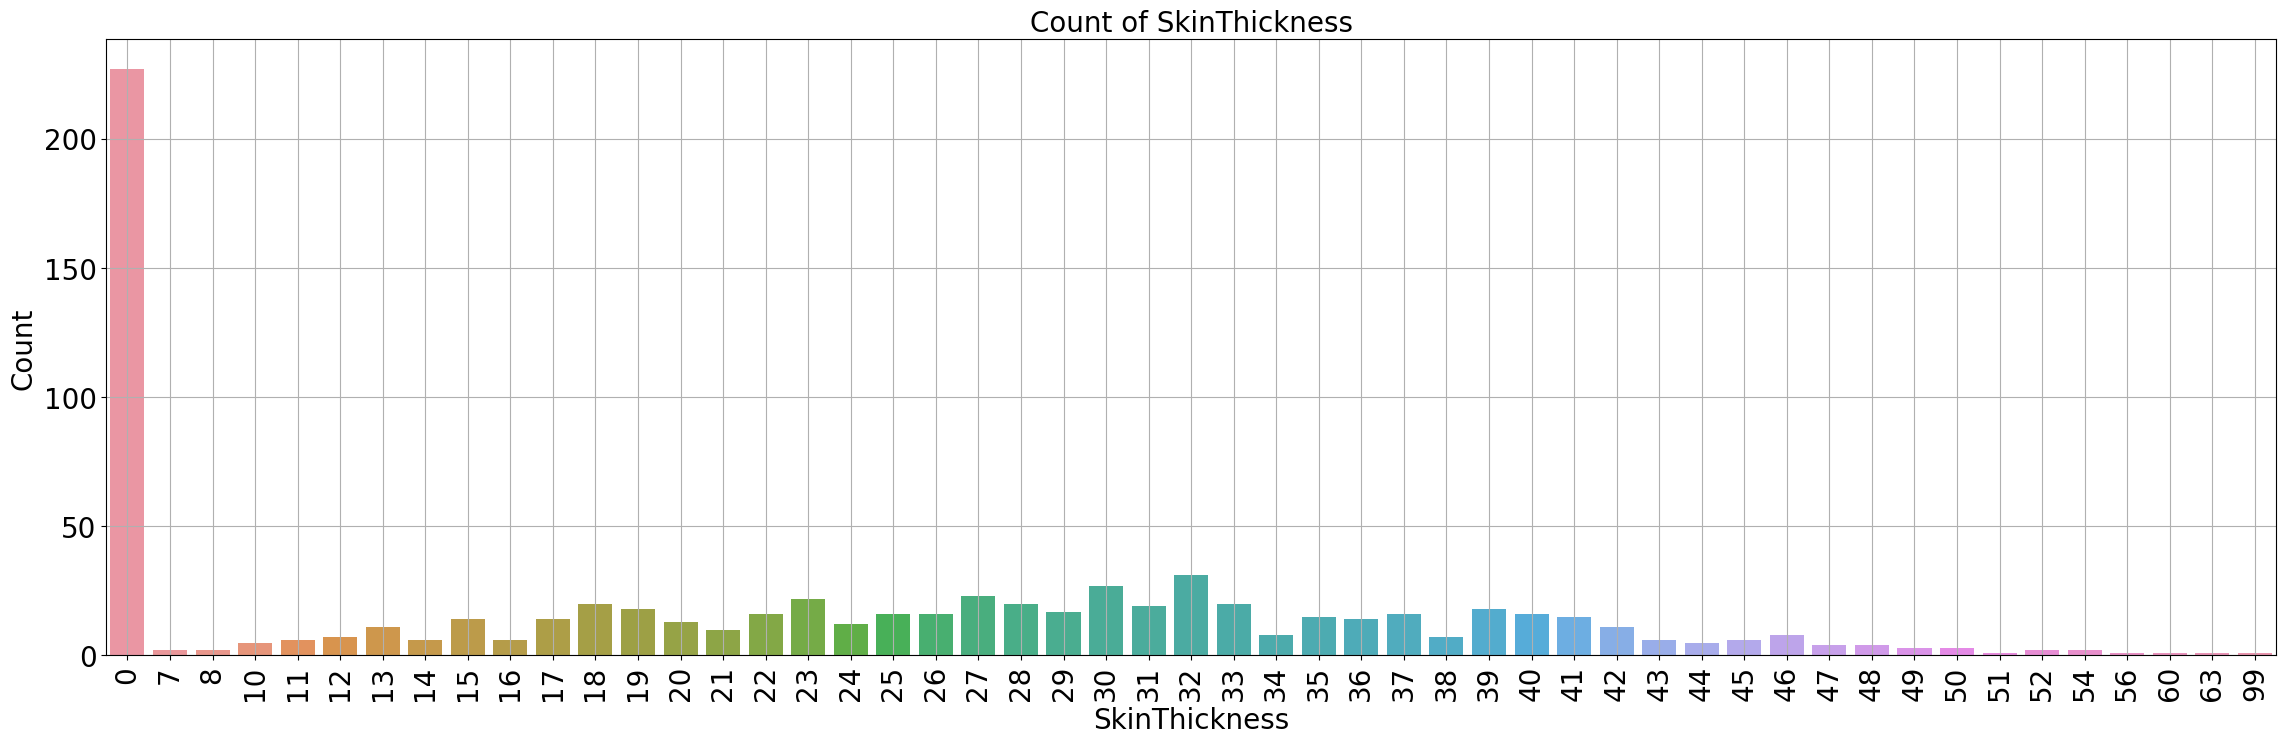

In [234]:
plt.figure(figsize=(28,8))
ax = sns.countplot(x="SkinThickness", data=Df)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("SkinThickness", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title('Count of SkinThickness', fontsize=20)
plt.grid()
plt.show()

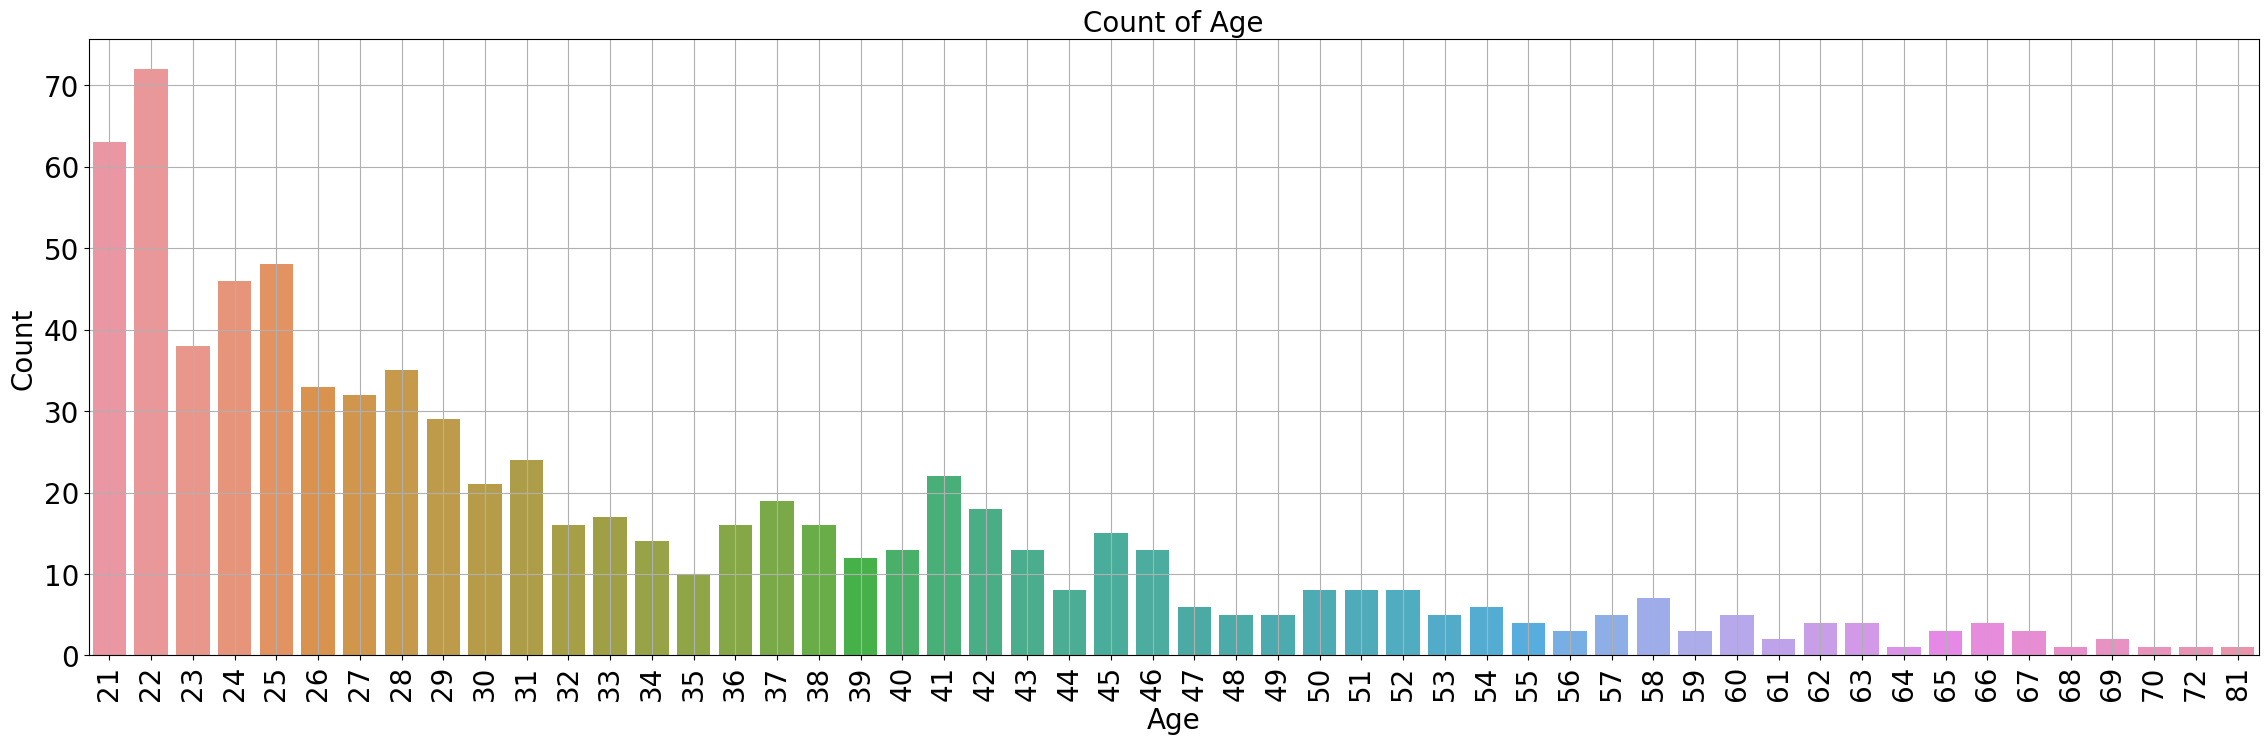

In [235]:
plt.figure(figsize=(28,8))
ax = sns.countplot(x="Age", data=Df)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Age", fontsize=20)
plt.ylabel("Count", fontsize=20)
plt.title('Count of Age', fontsize=20)
plt.grid()
plt.show()

In [236]:
df = Df[Df['SkinThickness']>0]
df = df[df['SkinThickness']<90]

In [237]:
df

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
3,89,66,23,94,28.1,0.167,21,0
4,137,40,35,168,43.1,2.288,33,1
6,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...
761,170,74,31,0,44.0,0.403,43,1
763,101,76,48,180,32.9,0.171,63,0
764,122,70,27,0,36.8,0.340,27,0
765,121,72,23,112,26.2,0.245,30,0


In [238]:
df2 = df.dropna(how='any')
df2.reset_index(drop=True, inplace=True)

In [239]:
X = pd.DataFrame(df2 , columns=[i for i in df2.columns[0:7]])
y = df2.Outcome.values.reshape(-1, 1)
X

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,148,72,35,0,33.6,0.627,50
1,85,66,29,0,26.6,0.351,31
2,89,66,23,94,28.1,0.167,21
3,137,40,35,168,43.1,2.288,33
4,78,50,32,88,31.0,0.248,26
...,...,...,...,...,...,...,...
535,170,74,31,0,44.0,0.403,43
536,101,76,48,180,32.9,0.171,63
537,122,70,27,0,36.8,0.340,27
538,121,72,23,112,26.2,0.245,30


In [240]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.35, random_state=0)

In [241]:
clf = GaussianNB()
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)

In [242]:
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.7671957671957672


In [243]:
from sklearn.metrics import classification_report, confusion_matrix
clf.classes_

array([0, 1])

In [244]:
confusion_matrix(y, clf.predict(X))

array([[301,  60],
       [ 65, 114]])

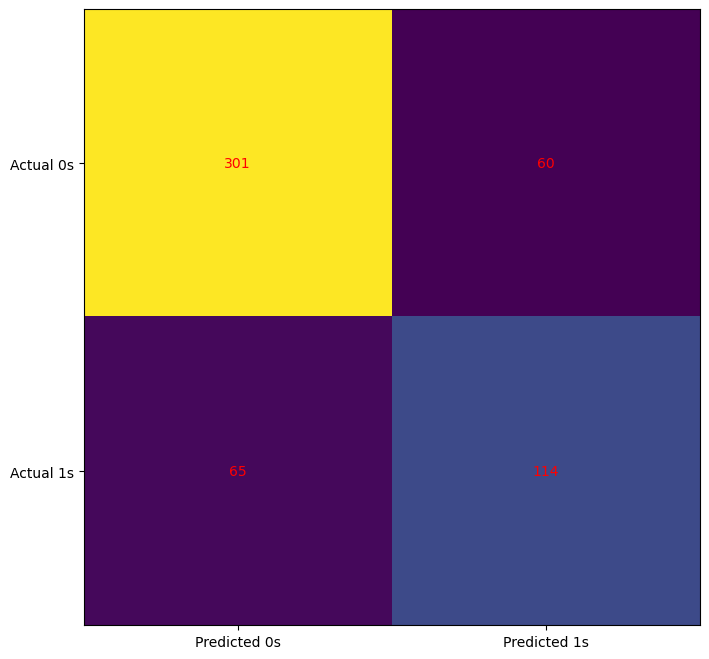

In [245]:
cm = confusion_matrix(y, clf.predict(X))

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

In [246]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83       361
           1       0.66      0.64      0.65       179

    accuracy                           0.77       540
   macro avg       0.74      0.74      0.74       540
weighted avg       0.77      0.77      0.77       540



In [247]:
P1 = clf.predict([[60, 32, 43, 93, 29.7, 0.371, 60]])
P1

/home/mohammad/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

In [248]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
K_fold = KFold(5)
print(cross_val_score(clf, X, y.ravel(), cv=K_fold, n_jobs=1))

[0.7962963  0.66666667 0.75       0.78703704 0.77777778]


In [249]:
df3 = df2[df2.index<108]
df4 = df2[df2.index>216]
df5 = pd.concat([df3, df4])
df5.reset_index(drop=True, inplace=True)
df5

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0
2,89,66,23,94,28.1,0.167,21,0
3,137,40,35,168,43.1,2.288,33,1
4,78,50,32,88,31.0,0.248,26,1
...,...,...,...,...,...,...,...,...
426,170,74,31,0,44.0,0.403,43,1
427,101,76,48,180,32.9,0.171,63,0
428,122,70,27,0,36.8,0.340,27,0
429,121,72,23,112,26.2,0.245,30,0


In [250]:
X = pd.DataFrame(df5 , columns=[i for i in df5.columns[0:7]])
y = df5.Outcome.values.reshape(-1, 1)

In [251]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.35, random_state=0)

In [252]:
clf = GaussianNB()
clf.fit(x_train, y_train.ravel())
y_pred = clf.predict(x_test)

In [253]:
print('Accuracy : ', metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.8410596026490066


In [254]:
confusion_matrix(y, clf.predict(X))

array([[255,  41],
       [ 46,  89]])

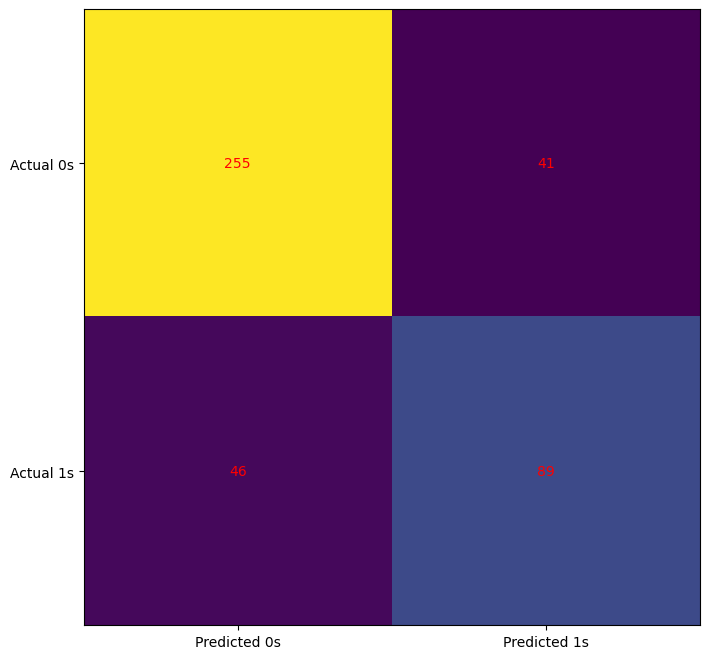

In [255]:
cm = confusion_matrix(y, clf.predict(X))

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()

In [256]:
P2 = clf.predict([[60, 32, 43, 93, 29.7, 0.371, 60]])
P2

/home/mohammad/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

In [257]:
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85       296
           1       0.68      0.66      0.67       135

    accuracy                           0.80       431
   macro avg       0.77      0.76      0.76       431
weighted avg       0.80      0.80      0.80       431



In [258]:
x, y = Data.Pregnancies.values.reshape(-1, 1), Data.Outcome
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=0)
clf = MultinomialNB()
clf.fit(x_train, y_train)
dis_proba_cols = pd.DataFrame(clf.predict_proba(x_train), columns=['x1', 'x2'])
dis_proba_cols

,x1,x2
0,0.641283,0.358717
1,0.641283,0.358717
2,0.641283,0.358717
3,0.641283,0.358717
4,0.641283,0.358717
...,...,...
494,0.641283,0.358717
495,0.641283,0.358717
496,0.641283,0.358717
497,0.641283,0.358717


In [259]:
x, y = Data.iloc[:, 1:-1], Data.Outcome
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=0)
clf = GaussianNB()
clf.fit(x_train, y_train)
cont_proba_cols = pd.DataFrame(clf.predict_proba(x_train), columns=['x3', 'x4'])
cont_proba_cols

,x3,x4
0,0.958403,0.041597
1,0.999608,0.000392
2,0.977246,0.022754
3,0.819951,0.180049
4,0.923457,0.076543
...,...,...
494,0.565909,0.434091
495,0.519850,0.480150
496,0.982148,0.017852
497,0.938248,0.061752


In [260]:
df3 = pd.concat([dis_proba_cols, cont_proba_cols, pd.DataFrame(y_train, columns=['Outcome']).reset_index(drop=True)], axis=1)
x, y = df3.iloc[:,:-1], df3.Outcome
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.35, random_state=0)
clf = GaussianNB()
clf.fit(x_train, y_train)
confusion_matrix(y, clf.predict(x))

array([[271,  49],
       [ 77, 102]])

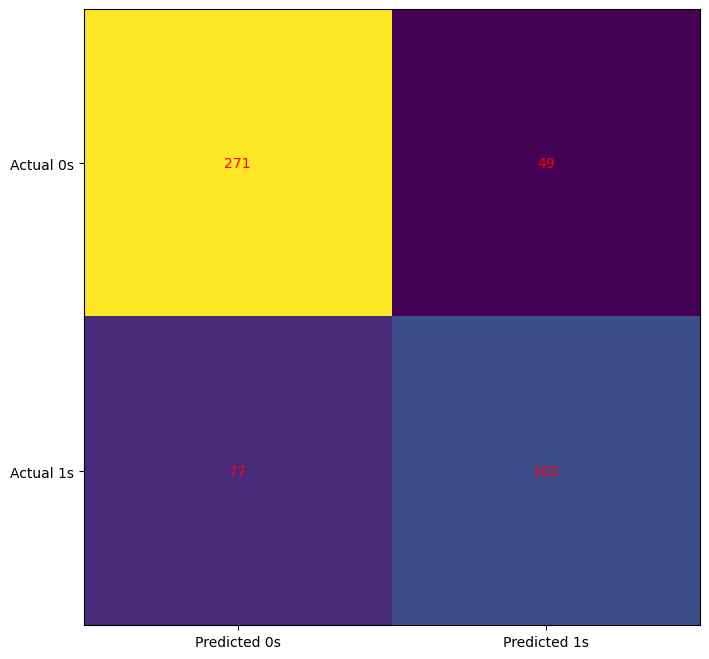

In [262]:
cm = confusion_matrix(y, clf.predict(x))

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5,-0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i,cm[i,j],ha='center',va='center',color='red')
plt.show()